# 5.2.3 Load and Read the CSV files

In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Paths to files
path_city_data = os.path.join('.','resources','city_data.csv')
path_ride_data = os.path.join('.','resources','ride_data.csv')

In [4]:
# Read the city data file and store it in a pandas DataFrame
df_city_data = pd.read_csv(path_city_data)

df_city_data.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
df_ride_data = pd.read_csv(path_ride_data)

df_ride_data.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## Inspect the City Data DataFrame

In [6]:
# Get the columns and the rows that are not null
df_city_data.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null
df_city_data.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column
df_city_data.dtypes  # Why no parentheses? Is `dtypes` not a method on a DataFrame object?

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city
df_city_data['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities
df_city_data['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

## Inspect Ride Data DataFrame

In [11]:
# Get the columns and the rows that are not null
df_ride_data.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columns and the rows that are not null
df_ride_data.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get the data types of each column
df_ride_data.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge DataFrames

In [14]:
# Combine the data into a single dataset
df_PyBer_data = pd.merge(df_ride_data, df_city_data, how='left', on=['city', 'city'])

# Display the DataFrame
df_PyBer_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# 5.3.1 Create DataFrames for Each Type of City

In [15]:
# Create the Urban city DataFrame
df_cities_urban = df_PyBer_data[df_PyBer_data['type'] == 'Urban']

df_cities_urban.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create the Suburban city DataFrame
df_cities_suburban = df_PyBer_data[df_PyBer_data['type'] == 'Suburban']

df_cities_suburban.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [17]:
# Create the Rural city DataFrame
df_cities_rural = df_PyBer_data[df_PyBer_data['type'] == 'Rural']

df_cities_rural.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


# 5.3.2 Get the Number of Rides for Each City Type

In [18]:
# Get the number of rides for urban cities
rides_urban = df_cities_urban.groupby('city')['ride_id'].count()

rides_urban.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Get the number of rides for suburban cities
rides_suburban = df_cities_suburban.groupby('city')['ride_id'].count()

rides_suburban.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [20]:
# Get the number of rides for rural cities
rides_rural = df_cities_rural.groupby('city')['ride_id'].count()

rides_rural.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

# 5.3.3 Get the Average Fare for Each City Type

In [21]:
# Get average fare for each city in the urban cities
mean_fare_urban = df_cities_urban.groupby('city')['fare'].mean()

mean_fare_urban.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
# Get average fare for each city in the suburban cities
mean_fare_suburban = df_cities_suburban.groupby('city')['fare'].mean()

mean_fare_suburban.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [23]:
# Get average fare for each city in the rural cities
mean_fare_rural = df_cities_rural.groupby('city')['fare'].mean()

mean_fare_rural.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

# 5.3.4 Get the Average Number of Drivers for Each City Type

In [24]:
# Get the average number of drivers for each rural city
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_city_data.sort_values(['type', 'city']))

,city,driver_count,type
115,Bradshawfurt,7,Rural
114,Garzaport,7,Rural
109,Harringtonfort,4,Rural
118,Jessicaport,1,Rural
110,Lake Jamie,4,Rural
111,Lake Latoyabury,2,Rural
106,Michaelberg,6,Rural
116,New Ryantown,2,Rural
104,Newtonview,1,Rural
105,North Holly,8,Rural


In [25]:
# Get the average number of drivers for each urban city
drivers_urban = df_cities_urban.groupby('city')['driver_count'].mean()

drivers_urban.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
# Get the average number of drivers for each rural city
drivers_rural = df_cities_rural.groupby('city')['driver_count'].mean()

drivers_rural.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [27]:
# Get the average number of drivers for each suburban city
drivers_suburban = df_cities_suburban.groupby('city')['driver_count'].mean()

drivers_suburban.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [28]:
# Get the average number of drivers for each rural city
drivers_rural = df_cities_rural.groupby('city')['driver_count'].mean()

drivers_rural.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

# 5.3.5 Create Bubble Charts

## Create the Urban Cities Bubble Chart

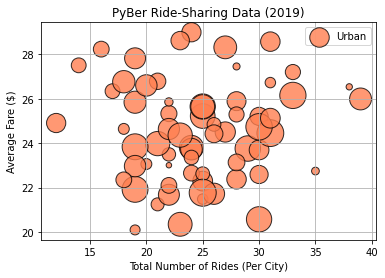

In [29]:
# Build the scatter plots for urban cities
fig, ax = plt.subplots()

ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.scatter(
    rides_urban,        # x-values
    mean_fare_urban,    # y-values
    label='Urban',
    s=10*drivers_urban, # More drivers = bigger dots
    color='coral',
    linewidths=1,
    edgecolors='k',     # black
    alpha=.8
)
ax.grid()               # Add grid
ax.legend()             # Add legend

# Create the Suburban Cities Bubble Chart

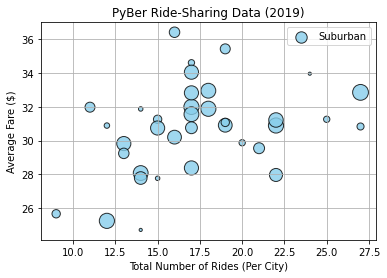

In [30]:
# Build the scatter plots for suburban cities
fig, ax = plt.subplots()

ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.scatter(
    rides_suburban,         # x-values
    mean_fare_suburban,     # y-values
    label='Suburban',
    s=10*drivers_suburban,  # More drivers = bigger dots
    color='skyblue',
    linewidths=1,
    edgecolors='k',         # black
    alpha=.8
)
ax.grid()                   # Add grid
ax.legend()                 # Add legend

# Create the Rural Cities Bubble Chart

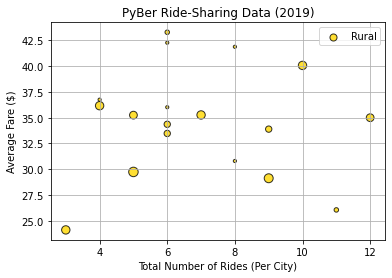

In [31]:
# Build the scatter plots for rural cities
fig, ax = plt.subplots()

ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.scatter(
    rides_rural,        # x-values
    mean_fare_rural,    # y-values
    label='Rural',
    s=10*drivers_rural, # More drivers = bigger dots
    color='gold',
    linewidths=1,
    edgecolors='k',     # black
    alpha=.8
)
ax.grid()               # Add grid
ax.legend()             # Add legend

# 5.3.6 Create a Bubble Chart for All Cities

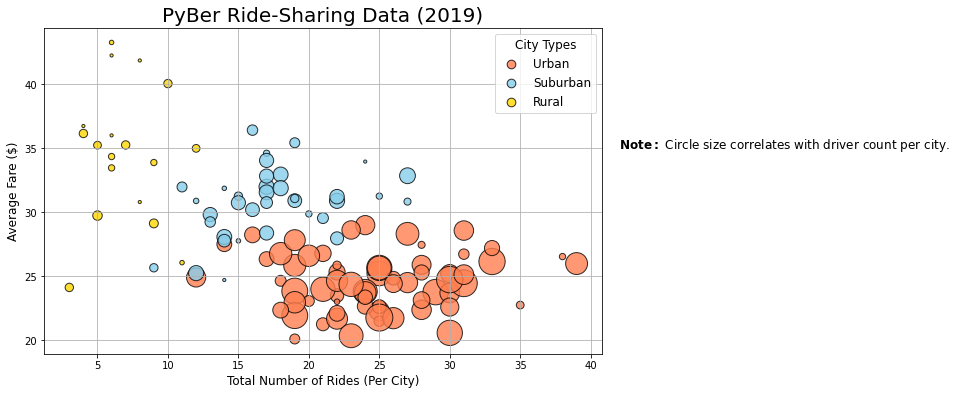

In [99]:
# Add the scatter charts for each type of city
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('PyBer Ride-Sharing Data (2019)', fontsize=20)
ax.set_xlabel('Total Number of Rides (Per City)', fontsize=12)
ax.set_ylabel('Average Fare ($)', fontsize=12)

# Urban
ax.scatter(
    rides_urban,        # x-values
    mean_fare_urban,    # y-values
    label='Urban',
    s=10*drivers_urban, # More drivers = bigger dots
    color='coral',
    linewidths=1,
    edgecolors='k',     # black
    alpha=.8
)

# Suburban
ax.scatter(
    rides_suburban,         # x-values
    mean_fare_suburban,     # y-values
    label='Suburban',
    s=10*drivers_suburban,  # More drivers = bigger dots
    color='skyblue',
    linewidths=1,
    edgecolors='k',         # black
    alpha=.8
)

# Rural
ax.scatter(
    rides_rural,        # x-values
    mean_fare_rural,    # y-values
    label='Rural',
    s=10*drivers_rural, # More drivers = bigger dots
    color='gold',
    linewidths=1,
    edgecolors='k',     # black
    alpha=.8
)
ax.grid()               # Add grid

lgnd = ax.legend(       # Add legend, and assign it to `lgnd`
#     mode='expand',
    loc='best',
    title='City Types',
    title_fontsize=12,
    fontsize=12,        # For the legend entries, not the legend title
    scatterpoints=1     # Number of markers for each series in the legend
)

# Set all three legend markers in `lgnd` to 75-point font size
for i in range(3):
    lgnd.legendHandles[i]._sizes = [75]

# Incorporate a text label about circle size.
plt.text(
    42, 35,  # What are the units for the coordinates?
    # Code for bold text from https://stackoverflow.com/a/44123579
    r'$\bf{Note:}$ Circle size correlates with driver count per city.',  # The `r` at the front is to ignore the `\`
    wrap=False,
    fontsize=12
)

# Save the figure.
plt.savefig(os.path.join('.','analysis','fig1_nowrap.png'))